# Definition

In [924]:
import pandas as pd
import xlsxwriter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from inspect import signature
from matplotlib import pyplot

%matplotlib inline
warnings.filterwarnings('ignore')

# Read From Dataset

In [925]:
writer = pd.ExcelWriter('Divar Split.xlsx',  
                   engine ='xlsxwriter') 
df = pd.read_csv('divar_posts_dataset.csv', 
            header=0)

# Preproccessing

In [926]:
column_names = ['mileage','price','year']
df_vehicle = df[(df['cat2']=='cars') & (df['price']!=-1) & (df['cat3']=='light')]
# Correct year column
df_vehicle['year'] = df_vehicle['year'].str.replace('[\W_]+', '')
# Convert Toman to Rial
df_vehicle['price'] = df_vehicle['price'].apply(lambda x: x * 1000 if x < 100000 else x)

In [927]:
df_vehicle['mileage'] = pd.to_numeric(df_vehicle['mileage'])
df_vehicle['price'] = pd.to_numeric(df_vehicle['price'])
df_vehicle['year'] = pd.to_numeric(df_vehicle['year'])

In [928]:
df_pride = df_vehicle[df_vehicle['brand'] == 'پراید صندوق‌دار::Pride']
df_peugeot206 = df_vehicle[df_vehicle['brand'] == 'پژو ۲۰۶‍::Peugeot 206']
df_peugeot405 = df_vehicle[df_vehicle['brand'] == 'پژو ۴۰۵::Peugeot 405']
df_pride['ID'] = np.arange(len(df_pride))
df_peugeot206['ID'] = np.arange(len(df_peugeot206))
df_peugeot405['ID'] = np.arange(len(df_peugeot405))

In [929]:
df_peugeot405

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year,ID
18,18,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Karaj,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,5.172880e+13,0,290000.0,web,8500000,پژو مدل 81 مشکی,NaN,1381,0
38,38,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Tehran,Thursday 08AM,بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم,2.080630e+13,3,125000.0,mobile,8500000,پژو405 مدل84,NaN,1384,1
101,101,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Shiraz,Sunday 08AM,از لحاظ متوری تمیز . بدون مشکل . کاپوت و گلگیر...,2.611290e+13,2,160.0,mobile,21000000,پژو ۴۰۵ TU5 بسیار تمیز,NaN,1392,2
173,173,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Tehran,Wednesday 04PM,پژو تمیز و خوش رخ کم کارکرد،بیمه تا خرداد ٩٦،ع...,5.171940e+13,3,120000.0,mobile,18500000,تمیز بدون خط و خش,NaN,1389,3
285,285,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Tehran,Monday 08AM,رنگ نوک مدادی متالیک دوگانه سوز ال پی جی بیمه ...,5.492980e+13,0,220.0,mobile,12500000,پژو 405 مدل 1383,NaN,1383,4
799,799,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Shiraz,Tuesday 12PM,پژو405 دوگانه کارخانه دلفینی فوق العاده تمیز ب...,6.721290e+13,0,1234.0,mobile,18500000,پژو405 دوگانه کارخانه,NaN,1387,5
811,811,False,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Mashhad,Tuesday 05PM,۴۰۵ مدل ۱۹۹۴ میلادی که میشه ۱۳۷۳ بدون رنگ سقف ...,4.021700e+13,3,379000.0,mobile,7500000,پژو ۴۰۵ فرانسه سفارش روسیه,NaN,1373,6
896,896,True,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Karaj,Thursday 02PM,عقب وجلو پلمپ بیمه تا برج 12 تخفیف 8 سال دوگان...,7.381540e+12,2,130000.0,mobile,5500000,پژو2000دوگانهCNG,NaN,1380,7
1120,1120,True,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Tehran,Tuesday 11AM,پژو 405 دوگانه سوز,5.950230e+13,1,130000.0,mobile,14000000,پژو 405 دوگانه سوز,NaN,1386,8
1151,1151,True,پژو ۴۰۵::Peugeot 405,vehicles,cars,light,Tehran,Wednesday 08AM,پژو مدل ٨٣ مشکى متالیک بیمه از اول تخفیف لاستی...,4.779760e+13,3,145000.0,mobile,10500000,پژو ٤٠٥ مدل ٨٣,NaN,1383,9


# Visualize Dataset

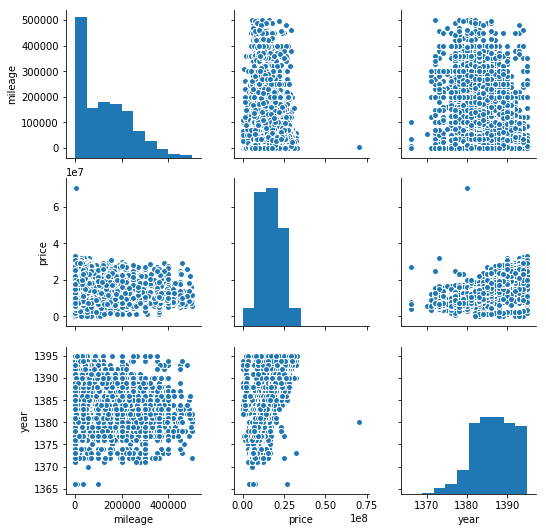

In [930]:
sns.pairplot(df_peugeot405.loc[:,['mileage','price','year']])

# Normalize Data

In [931]:
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
def NormalizeData(df,column_names):
    scaled_df = scaler.fit_transform(df[column_names])
    scaled_df = pd.DataFrame(scaled_df, columns=column_names)
    return scaled_df
scaled_df_peugeot405 = NormalizeData(df_peugeot405,column_names)
scaled_df_peugeot206 = NormalizeData(df_peugeot206,column_names)
scaled_df_pride = NormalizeData(df_pride,column_names)

In [932]:
print(scaled_df_peugeot405)

        mileage     price      year
0      1.569163 -1.355543 -1.163313
1      0.024590 -1.355543 -0.564264
2     -1.144043  0.592023  1.033201
3     -0.022215  0.202510  0.434152
4     -1.143481 -0.732322 -0.763947
5     -1.133989  0.202510  0.034785
6      2.402296 -1.511348 -2.760778
7      0.071396 -1.822958 -1.362996
8      0.071396 -0.498614 -0.164898
9      0.211811 -1.043932 -0.763947
10    -1.135140 -1.059513 -1.163313
11    -1.006997  1.994269  1.432567
12     0.071396  0.124607 -0.164898
13     1.260249 -0.342809 -0.763947
14    -1.143341 -0.966030 -0.763947
15    -0.817904  1.261985  1.033201
16     0.071396  0.436217  0.234469
17    -1.145513 -1.511348 -2.561095
18     1.756384 -0.280487 -0.364581
19    -0.864709 -2.539662 -0.564264
20    -1.144324  0.623184  0.633835
21    -0.752377  1.028277  1.232884
22     2.552073 -0.342809 -0.164898
23    -0.808543 -1.043932 -0.564264
24    -0.377935  0.436217  0.833518
25    -1.145260  1.152921  1.232884
26    -0.022215  0.358315  0

## Plot after normalize

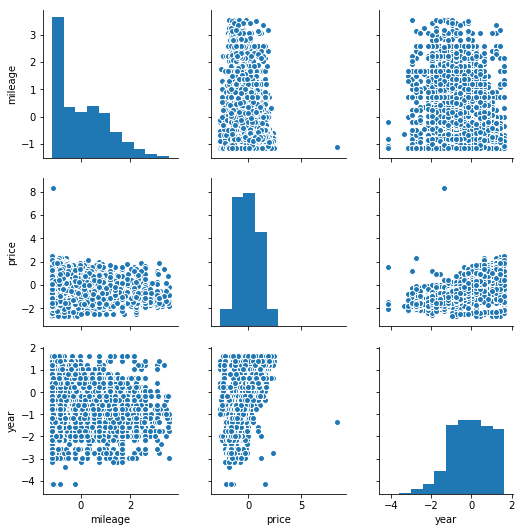

In [933]:
sns.pairplot(scaled_df_peugeot405)

# Clustering

In [934]:
Nc = range(1, 20)
kmeans_peugeot405 = [KMeans(n_clusters=i) for i in Nc]
kmeans_peugeot206 = [KMeans(n_clusters=i) for i in Nc]
kmeans_pride = [KMeans(n_clusters=i) for i in Nc]

## Find Best Number of Clusters

In [935]:
def findBestNumberOfClusters(kmeans,df):    
    score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
    plt.plot(Nc,score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

### Peugeot 405

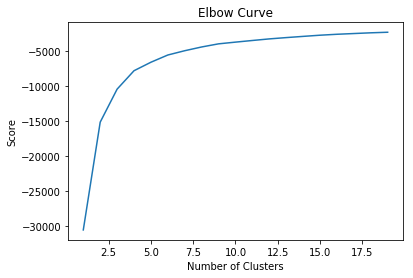

In [936]:
findBestNumberOfClusters(kmeans_peugeot405, scaled_df_peugeot405)

### Peugeot 206

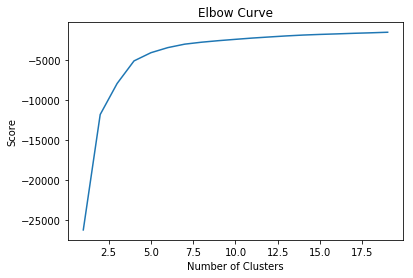

In [937]:
findBestNumberOfClusters(kmeans_peugeot206, scaled_df_peugeot206)

### Pride

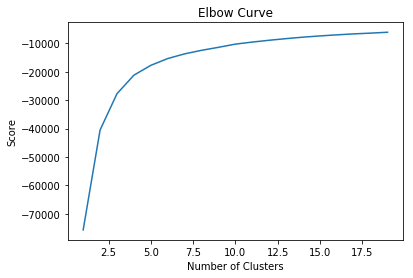

In [938]:
findBestNumberOfClusters(kmeans_pride, scaled_df_pride)

## Implement Kmeans

In [939]:
number_cluster_405 = 8
number_cluster_206 = 7
number_cluster_pride = 10

kmeans_peugeot405 = KMeans(n_clusters = number_cluster_405, random_state=0).fit(scaled_df_peugeot405)
kmeans_peugeot206 = KMeans(n_clusters = number_cluster_206, random_state=0).fit(scaled_df_peugeot206)
kmeans_pride = KMeans(n_clusters = number_cluster_pride, random_state=0).fit(scaled_df_pride)

In [940]:
def dfAfterKmeans(kmeans, df):
    dist = kmeans.transform(df)**2
    df['sqdist'] = dist.sum(axis=1).round(2)
    df['cluster'] = kmeans.labels_
    df['ID'] = np.arange(len(df))
    return df
scaled_df_peugeot405 = dfAfterKmeans(kmeans_peugeot405, scaled_df_peugeot405)
scaled_df_peugeot206 = dfAfterKmeans(kmeans_peugeot206, scaled_df_peugeot206)
scaled_df_pride = dfAfterKmeans(kmeans_pride, scaled_df_pride)

In [941]:
print(scaled_df_peugeot405)

        mileage     price      year  sqdist  cluster     ID
0      1.569163 -1.355543 -1.163313   54.32        7      0
1      0.024590 -1.355543 -0.564264   32.38        4      1
2     -1.144043  0.592023  1.033201   58.85        5      2
3     -0.022215  0.202510  0.434152   31.40        3      3
4     -1.143481 -0.732322 -0.763947   38.76        0      4
5     -1.133989  0.202510  0.034785   39.72        5      5
6      2.402296 -1.511348 -2.760778  123.03        7      6
7      0.071396 -1.822958 -1.362996   49.34        6      7
8      0.071396 -0.498614 -0.164898   24.33        4      8
9      0.211811 -1.043932 -0.763947   29.12        4      9
10    -1.135140 -1.059513 -1.163313   45.33        0     10
11    -1.006997  1.994269  1.432567  103.18        1     11
12     0.071396  0.124607 -0.164898   25.89        3     12
13     1.260249 -0.342809 -0.763947   35.81        4     13
14    -1.143341 -0.966030 -0.763947   40.65        0     14
15    -0.817904  1.261985  1.033201   66

In [942]:
scaled_df_peugeot405.loc[scaled_df_peugeot405.cluster == 0].count()

mileage    1116
price      1116
year       1116
sqdist     1116
cluster    1116
ID         1116
dtype: int64

## Visualize Clusters

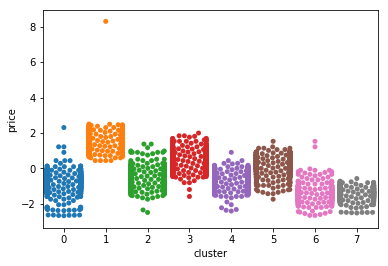

In [943]:
sns.swarmplot(scaled_df_peugeot405.cluster,scaled_df_peugeot405.price)

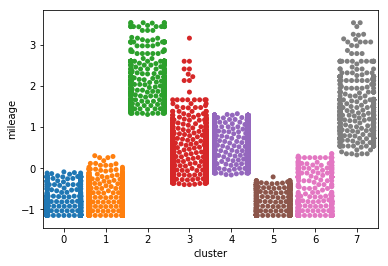

In [944]:
sns.swarmplot(scaled_df_peugeot405.cluster,scaled_df_peugeot405.mileage)

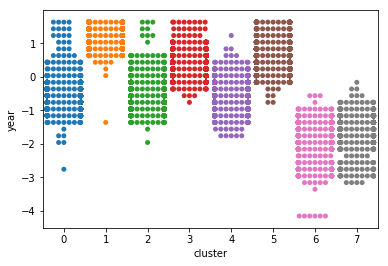

In [945]:
sns.swarmplot(scaled_df_peugeot405.cluster,scaled_df_peugeot405.year)

# Find Outliers Data

## Implement By ZScore

In [946]:
def detect_outlier_zscore(data):
    outliers = pd.DataFrame([], columns=['ID','sqdist','cluster'])
    threshold = 3
    mean = np.mean(data.sqdist)
    std = np.std(data.sqdist)
    
    for y in data.itertuples():
        z_score= (y.sqdist - mean)/std
        if np.abs(z_score) > threshold:
            outliers = outliers.append({'ID':y.ID,'sqdist':y.sqdist,'cluster':y.cluster},ignore_index=True)
    return outliers    

## Implement By Quantile

In [947]:
def detect_outlier_quantile(data, percent):
    quantile = data.sqdist.quantile(percent)
    outliers = pd.DataFrame([], columns=['ID','sqdist','cluster'])
    for y in data.itertuples():
        if y.sqdist > quantile:
            outliers = outliers.append({'ID':y.ID,'sqdist':y.sqdist,'cluster':y.cluster},ignore_index=True)
    return outliers    

In [948]:
def outliers(df,numCluster):
    clusters = []
    outliers_quantile = pd.DataFrame([], columns=['ID','sqdist','cluster'])
    outliers_zscore = pd.DataFrame([], columns=['ID','sqdist','cluster'])
    for i in range (numCluster):    
        clusters.append(df.loc[df.cluster == i])
        outliers_quantile = outliers_quantile.append(detect_outlier_quantile(clusters[i],0.75), ignore_index=True)
        outliers_zscore = outliers_zscore.append(detect_outlier_zscore(clusters[i]), ignore_index=True)
    return outliers_zscore, outliers_quantile

outliers_zscore_405, outliers_quantile_405 = outliers(scaled_df_peugeot405,number_cluster_405)
outliers_zscore_206, outliers_quantile_206 = outliers(scaled_df_peugeot206,number_cluster_206)
outliers_zscore_pride, outliers_quantile_pride = outliers(scaled_df_pride,number_cluster_pride)

In [949]:
print(outliers_zscore_206)

        ID  sqdist  cluster
0    211.0   51.01      0.0
1    321.0   37.54      0.0
2    468.0   38.64      0.0
3    625.0   42.69      0.0
4    690.0   40.39      0.0
5    747.0   53.31      0.0
6   1285.0   39.92      0.0
7   1330.0   40.39      0.0
8   1604.0   50.56      0.0
9   3559.0   40.66      0.0
10  5230.0  104.30      0.0
11  5760.0   38.25      0.0
12  6436.0   43.30      0.0
13  6504.0   81.36      0.0
14  6543.0   41.61      0.0
15  7215.0   63.91      0.0
16  7319.0   49.58      0.0
17  7888.0   40.36      0.0
18  7928.0   40.63      0.0
19   247.0  102.00      1.0
20   258.0   62.04      1.0
21  2367.0   95.77      1.0
22  2491.0   67.99      1.0
23  3244.0   95.77      1.0
24  4209.0   60.47      1.0
25  4228.0   64.56      1.0
26  5030.0   65.65      1.0
27  6556.0   95.77      1.0
28  6964.0   60.74      1.0
29  8219.0   65.47      1.0
..     ...     ...      ...
52  1189.0   82.25      4.0
53  1357.0   85.32      4.0
54  2232.0   73.06      4.0
55  3399.0   74.87  

In [950]:
print(outliers_quantile_206)

          ID  sqdist  cluster
0       15.0   24.72      0.0
1       36.0   24.74      0.0
2       37.0   26.38      0.0
3      105.0   23.61      0.0
4      134.0   25.01      0.0
5      144.0   26.76      0.0
6      148.0   24.61      0.0
7      211.0   51.01      0.0
8      270.0   24.98      0.0
9      311.0   25.80      0.0
10     321.0   37.54      0.0
11     340.0   23.66      0.0
12     350.0   24.89      0.0
13     351.0   23.62      0.0
14     358.0   31.51      0.0
15     359.0   26.27      0.0
16     375.0   26.93      0.0
17     397.0   27.60      0.0
18     408.0   23.84      0.0
19     410.0   24.20      0.0
20     424.0   24.35      0.0
21     452.0   25.21      0.0
22     465.0   23.75      0.0
23     468.0   38.64      0.0
24     514.0   27.30      0.0
25     518.0   27.80      0.0
26     523.0   31.49      0.0
27     527.0   24.45      0.0
28     533.0   24.43      0.0
29     575.0   24.75      0.0
...      ...     ...      ...
2155  7521.0   46.87      6.0
2156  7575

In [951]:
def checkTrue(x, outliers, clusterNum):
    for i in range (clusterNum):
        if len(outliers.loc[outliers.ID==x]) != 0:
            return True
    return False
df_peugeot405['Label'] = df_peugeot405['ID'].apply(lambda x: 1 if checkTrue(x, outliers_quantile_405, number_cluster_405) else 0)
scaled_df_peugeot405['Label'] = scaled_df_peugeot405['ID'].apply(lambda x: 1 if checkTrue(x, outliers_quantile_405, number_cluster_405) else 0)
df_peugeot206['Label'] = df_peugeot206['ID'].apply(lambda x: 1 if checkTrue(x, outliers_zscore_206, number_cluster_206) else 0)
scaled_df_peugeot206['Label'] = scaled_df_peugeot206['ID'].apply(lambda x: 1 if checkTrue(x, outliers_zscore_206, number_cluster_206) else 0)
df_pride['Label'] = df_pride['ID'].apply(lambda x: 1 if checkTrue(x, outliers_quantile_pride, number_cluster_pride) else 0)
scaled_df_pride['Label'] = scaled_df_pride['ID'].apply(lambda x: 1 if checkTrue(x, outliers_quantile_pride, number_cluster_pride) else 0)

In [952]:
print(scaled_df_peugeot206.loc[:,['ID','Label']])

        ID  Label
0        0      0
1        1      0
2        2      0
3        3      0
4        4      0
5        5      0
6        6      0
7        7      0
8        8      0
9        9      0
10      10      0
11      11      0
12      12      0
13      13      0
14      14      0
15      15      0
16      16      0
17      17      0
18      18      0
19      19      0
20      20      0
21      21      0
22      22      0
23      23      0
24      24      0
25      25      0
26      26      0
27      27      0
28      28      0
29      29      0
...    ...    ...
8715  8715      0
8716  8716      0
8717  8717      0
8718  8718      0
8719  8719      0
8720  8720      0
8721  8721      0
8722  8722      0
8723  8723      0
8724  8724      0
8725  8725      0
8726  8726      0
8727  8727      0
8728  8728      0
8729  8729      0
8730  8730      0
8731  8731      0
8732  8732      0
8733  8733      0
8734  8734      0
8735  8735      0
8736  8736      0
8737  8737      0
8738  8738

# Decomposition PCA

## 405

In [953]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df_peugeot405.loc[:,column_names])
principalDf_405 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf_405 = pd.concat([principalDf_405, scaled_df_peugeot405['Label']], axis = 1)

## 206

In [954]:
principalComponents = pca.fit_transform(scaled_df_peugeot206.loc[:,column_names])
principalDf_206 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf_206 = pd.concat([principalDf_206, scaled_df_peugeot206['Label']], axis = 1)

## Pride

In [955]:
principalComponents = pca.fit_transform(scaled_df_pride.loc[:,column_names])
principalDf_pride = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf_pride = pd.concat([principalDf_pride, scaled_df_pride['Label']], axis = 1)

# Visualize PCA

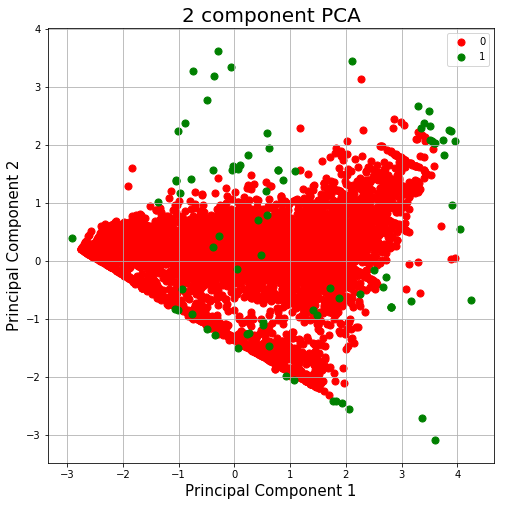

In [956]:
def visualize_pca(df):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = df['Label'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
visualize_pca(finalDf_206)

In [957]:
print(finalDf_405.loc[:,['principal component 1', 'principal component 2']])

       principal component 1  principal component 2
0                  -2.283665               0.647830
1                  -1.235477              -0.562741
2                   1.530166              -0.536385
3                   0.415739               0.174223
4                  -0.461496              -1.487962
5                   0.640407              -0.950877
6                  -3.761366               0.864070
7                  -2.063414              -0.906780
8                  -0.454126              -0.137708
9                  -1.244759              -0.359991
10                 -0.928619              -1.702021
11                  2.620555               0.136029
12                 -0.056468               0.051962
13                 -1.249505               0.799334
14                 -0.610679              -1.558961
15                  1.817010              -0.038233
16                  0.397116               0.268805
17                 -2.104090              -2.275918
18          

# Prediction

In [958]:
def predict(df):
    trainX, testX, trainy, testy = train_test_split(df.loc[:,['principal component 1', 'principal component 2']], df.loc[:,['Label']], test_size=0.4, random_state=2)
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(trainX, trainy)
    probs = model.predict_proba(testX)
    probs = probs[:, 1]
    auc = roc_auc_score(testy, probs)
    print('AUC: %.3f' % auc)
    fpr, tpr, thresholds = roc_curve(testy, probs)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    pyplot.show()
    return trainX, testX, trainy, testy, model, probs, auc

## 405

AUC: 0.969


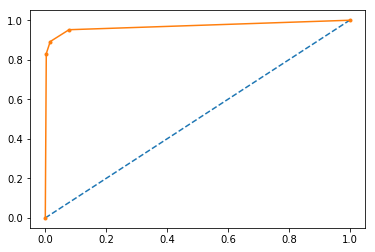

In [959]:
trainX_405, testX_405, trainy_405, testy_405, model_405, probs_405, auc_405 = predict(finalDf_405)

## 206

AUC: 0.873


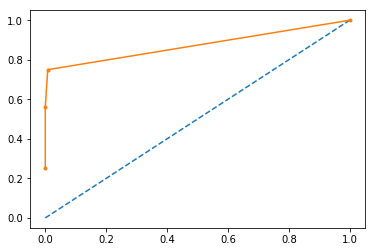

In [960]:
trainX_206, testX_206, trainy_206, testy_206, model_206, probs_206, auc_206 = predict(finalDf_206)

## Pride

AUC: 0.893


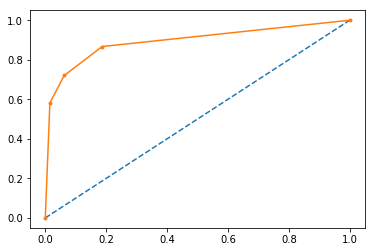

In [961]:
trainX_pride, testX_pride, trainy_pride, testy_pride, model_pride, probs_pride, auc_pride = predict(finalDf_pride)

# Precision and Recall

In [962]:
def precision_recall(model, testX, testy, probs):
    yhat = model.predict(testX)
    precision, recall, thresholds = precision_recall_curve(testy, probs)

    f1 = f1_score(testy, yhat)
    au = auc(recall, precision)
    ap = average_precision_score(testy, probs)
    print('f1=%.3f au=%.3f ap=%.3f' % (f1, au, ap))

    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    pyplot.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.plot(recall, precision, marker='.')
    pyplot.show()

## 405

f1=0.919 au=0.963 ap=0.939


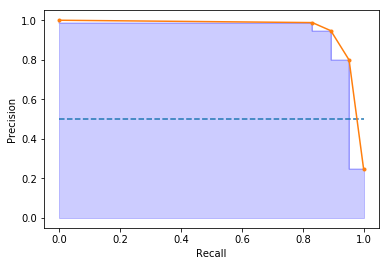

In [963]:
precision_recall(model_405,testX_405,testy_405,probs_405)

## 206

f1=0.720 au=0.758 ap=0.651


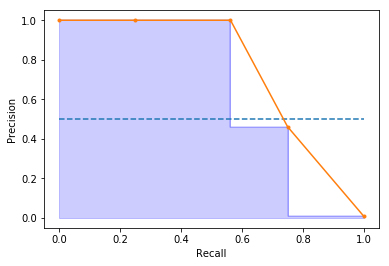

In [964]:
precision_recall(model_206,testX_206,testy_206,probs_206)

## Pride

f1=0.756 au=0.841 ap=0.773


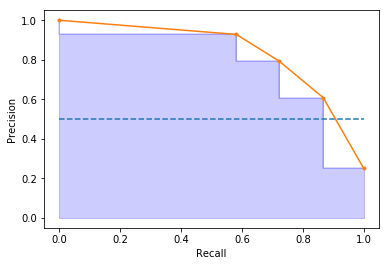

In [965]:
precision_recall(model_pride,testX_pride,testy_pride,probs_pride)

# Save

In [966]:
df_peugeot405.to_excel(writer, sheet_name ='peugeot 405')
df_peugeot206.to_excel(writer, sheet_name ='peugeot 206')
df_pride.to_excel(writer, sheet_name ='pride')  
        
writer.save() 